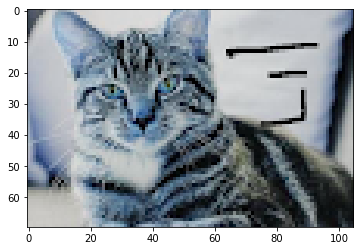

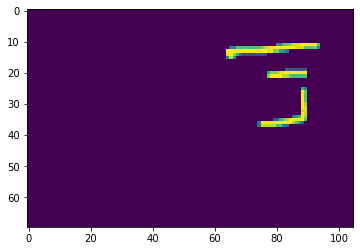

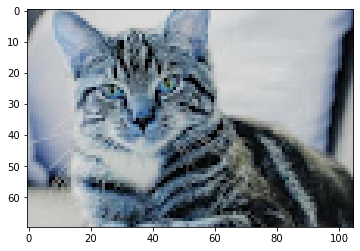

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
#open the image
img=cv2.imread('dimage_damaged.png')
plt.imshow(img)
plt.show()
#load the mask
mask=cv2.imread('dimage_mask.png',0)
plt.imshow(mask)
plt.show()
#Inpaint
dst=cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)
#Write dthe output
cv2.imwrite('dimage_inpainted.png',dst)
plt.imshow(dst)
plt.show()

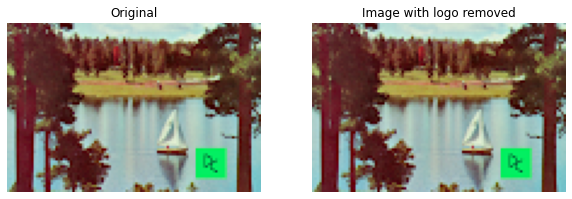

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize']=(10,8)
def show_image(image,title='Image',cmap_type='gray'):
    plt.imshow(image,cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
def plot_comparison(img_original,img_filtered,img_title_filtered):
    fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,8),sharex=True,sharey=True)
    ax1.imshow(img_original,cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered,cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color
image_with_logo=plt.imread('imlogo.png')
#Initialize the mask
mask=np.zeros(image_with_logo.shape[:-1])
#Set the pixels where the logo is to 1
mask[210:272,360:425]=1
#Applying inpainting to remove the logo
image_logo_removed=inpaint.inpaint_biharmonic(image_with_logo,
                                              mask,
                                              multichannel=True)
# show the original and logo removed images
plot_comparison(image_with_logo,image_logo_removed,'Image with logo removed')

    

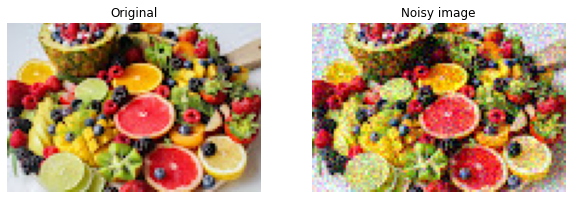

In [4]:
from skimage.util import random_noise
fruit_image=plt.imread('fruitts.jpeg')
#Add noise to the image
noisy_image=random_noise(fruit_image)
#Show the original and resulting image
plot_comparison(fruit_image,noisy_image,'Noisy image')

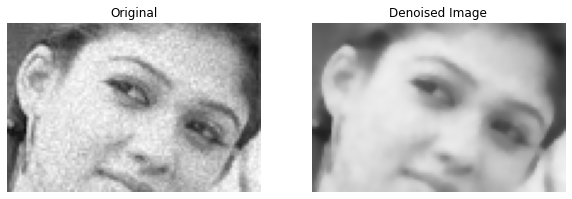

In [2]:
from skimage.restoration import denoise_tv_chambolle
noisy_image=plt.imread('noisy.jpg')
#apply total variation filter denoising
denoised_image=denoise_tv_chambolle(noisy_image,multichannel=True)
#show the noisy and denoised image
plot_comparison(noisy_image,denoised_image,'Denoised Image')

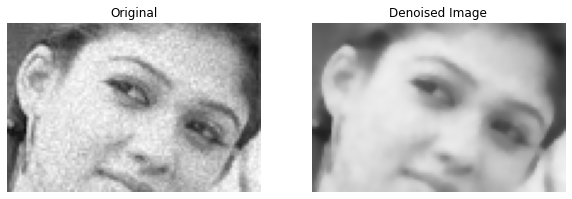

In [4]:
from skimage.restoration import denoise_bilateral
landscape_image=plt.imread('noisy.jpg')
#apply bilateral filter denoising
denoised_image=denoise_tv_chambolle(landscape_image,multichannel=True)
#show the original and resulting image
plot_comparison(landscape_image,denoised_image,'Denoised Image')

<ipython-input-6-f4333ef776e8>:6: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments=slic(face_image,n_segments=400)
<ipython-input-6-f4333ef776e8>:8: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segmented_image=label2rgb(segments,face_image,kind='avg')


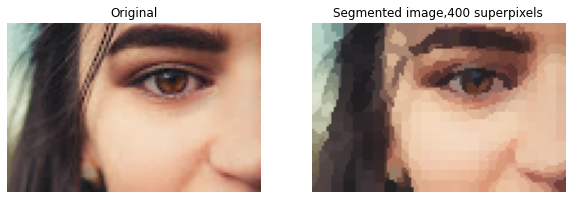

In [6]:
from skimage.segmentation import slic
from skimage.color import label2rgb

face_image=plt.imread('face.jpg')

segments=slic(face_image,n_segments=400)

segmented_image=label2rgb(segments,face_image,kind='avg')

plot_comparison(face_image,segmented_image,'Segmented image,400 superpixels')

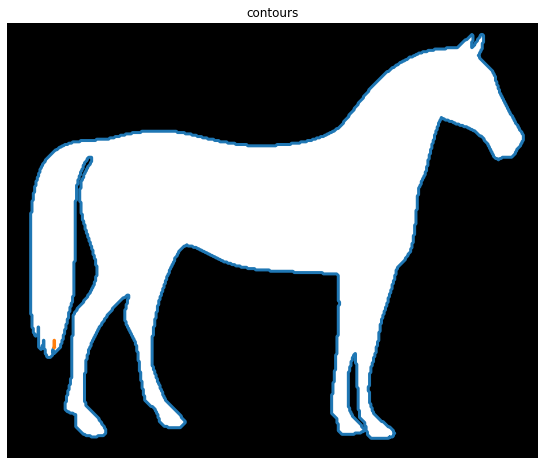

In [7]:
def show_image_contour(image,contours):
    plt.figure()
    for n,contour in enumerate(contours):
        plt.plot(contour[:,1],contour[:,0],linewidth=3)
        plt.imshow(image,interpolation='nearest',cmap='gray_r')
        plt.title('contours')
        plt.axis('off')


from skimage import measure,data
#obtain the horse image
horse_image=data.horse()
#find the contours with a constant level value of0.8
contours=measure.find_contours(horse_image,level=0.8)
show_image_contour(horse_image,contours)


<ipython-input-10-96e322d090bd>:6: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image_dices = color.rgb2gray(image_dices)


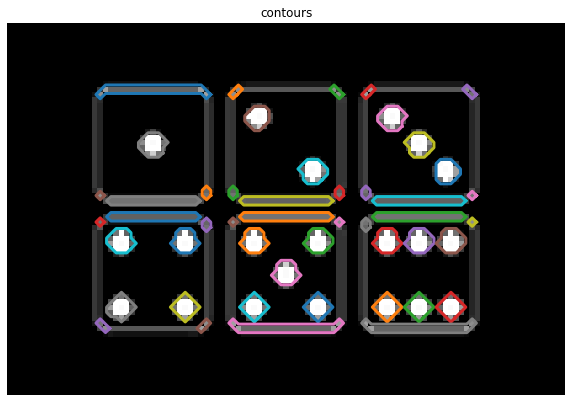

In [10]:
from skimage.io import imread
from skimage.filters import threshold_otsu

image_dices = imread('diceimg.png')

image_dices = color.rgb2gray(image_dices)

thresh = threshold_otsu(image_dices)

binary = image_dices>thresh

contours = measure.find_contours(binary,level=0.8)

show_image_contour(image_dices,contours)




Dice dots number:48.


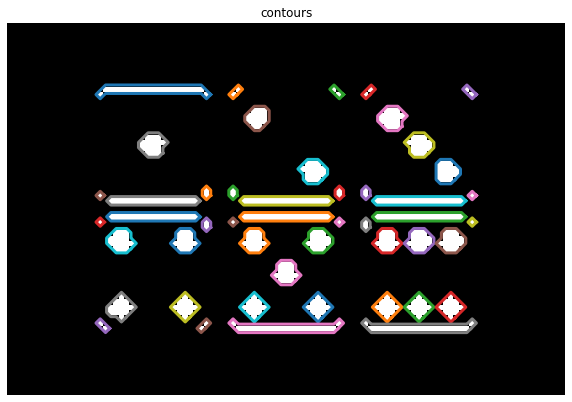

In [9]:
shape_contours=[cnt.shape[0] for cnt in contours]

max_dots_shape=50

dots_contours=[cnt for cnt in contours if np.shape(cnt)[0]<max_dots_shape]

show_image_contour(binary,contours)

print('Dice dots number:{}.'.format(len(dots_contours)))